# Ejercicio 1: Generador de Números Aleatorios LCG (Linear Congruential Generator)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Definición de la clase LCG

In [2]:
class LCG:
    def __init__(self, m, a, c, seed):
        self.m = m
        self.a = a
        self.c = c
        self.current = seed
    
    def next(self):
        self.current = (self.a * self.current + self.c) % self.m
        return self.current
    
    def generate_sample(self, n):
        return [self.next() for _ in range(n)]
    
    def generate_uniform_01(self, n):
        return [self.next() / self.m for _ in range(n)]

## Funciones de análisis estadístico

In [3]:
def estadisticos(muestra, nombre):
    print(f"\n=== Estadísticos para {nombre} ===")
    print(f"Media: {np.mean(muestra):.6f}")
    print(f"Varianza: {np.var(muestra, ddof=1):.6f}")
    print(f"Desviación estándar: {np.std(muestra, ddof=1):.6f}")
    print(f"Mínimo: {np.min(muestra):.6f}")
    print(f"Máximo: {np.max(muestra):.6f}")


def prueba_kolmogorov_smirnov(muestra):
    statistic, p_value = stats.kstest(muestra, 'uniform', args=(0, 1))
    print(f"\n=== Prueba de Kolmogorov-Smirnov ===")
    print(f"Estadístico KS: {statistic:.6f}")
    print(f"P-valor: {p_value:.6f}")
    if p_value > 0.05:
        print("No se rechaza H0: Los datos siguen una distribución uniforme (0,1)")
    else:
        print("Se rechaza H0: Los datos NO siguen una distribución uniforme (0,1)")
    return statistic, p_value


def prueba_chi_cuadrado(muestra, k=10):
    observed, bin_edges = np.histogram(muestra, bins=k, range=(0, 1))
    expected = len(muestra) / k
    chi2_stat = np.sum((observed - expected)**2 / expected)
    df = k - 1
    p_value = 1 - stats.chi2.cdf(chi2_stat, df)
    
    print(f"\n=== Prueba de Chi-Cuadrado ===")
    print(f"Estadístico Chi²: {chi2_stat:.6f}")
    print(f"Grados de libertad: {df}")
    print(f"P-valor: {p_value:.6f}")
    if p_value > 0.05:
        print("No se rechaza H0: Los datos siguen una distribución uniforme")
    else:
        print("Se rechaza H0: Los datos NO siguen una distribución uniforme")
    return chi2_stat, p_value

## Función de visualización

In [4]:
def graficar_resultados(muestra, titulo):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    axes[0, 0].hist(muestra, bins=50, density=True, alpha=0.7, edgecolor='black')
    axes[0, 0].axhline(y=1, color='r', linestyle='--', label='Uniforme teórica')
    axes[0, 0].set_title(f'Histograma - {titulo}')
    axes[0, 0].set_xlabel('Valor')
    axes[0, 0].set_ylabel('Densidad')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    axes[0, 1].plot(muestra[:1000], 'o', markersize=2, alpha=0.5)
    axes[0, 1].set_title('Secuencia de valores (primeros 1000)')
    axes[0, 1].set_xlabel('Índice')
    axes[0, 1].set_ylabel('Valor')
    axes[0, 1].grid(True, alpha=0.3)
    
    sorted_data = np.sort(muestra)
    empirical_cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    theoretical_cdf = sorted_data
    axes[1, 0].plot(sorted_data, empirical_cdf, label='CDF empírica', linewidth=2)
    axes[1, 0].plot(sorted_data, theoretical_cdf, 'r--', label='CDF teórica', linewidth=2)
    axes[1, 0].set_title('Función de Distribución Acumulada')
    axes[1, 0].set_xlabel('Valor')
    axes[1, 0].set_ylabel('Probabilidad acumulada')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    stats.probplot(muestra, dist="uniform", plot=axes[1, 1])
    axes[1, 1].set_title('Q-Q Plot')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'{titulo.replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
    plt.show()

## Configuración de parámetros

In [5]:
N = 10000
seed = 42

## Conjunto de Parámetros 1: Park-Miller (MINSTD)

CONJUNTO DE PARÁMETROS 1: Park-Miller (MINSTD)

=== Estadísticos para EJERCICIO 1 (Park-Miller) ===
Media: 0.499379
Varianza: 0.083432
Desviación estándar: 0.288846
Mínimo: 0.000063
Máximo: 0.999995

=== Prueba de Kolmogorov-Smirnov ===
Estadístico KS: 0.005009
P-valor: 0.962268
No se rechaza H0: Los datos siguen una distribución uniforme (0,1)

=== Prueba de Chi-Cuadrado ===
Estadístico Chi²: 7.570000
Grados de libertad: 9
P-valor: 0.577991
No se rechaza H0: Los datos siguen una distribución uniforme


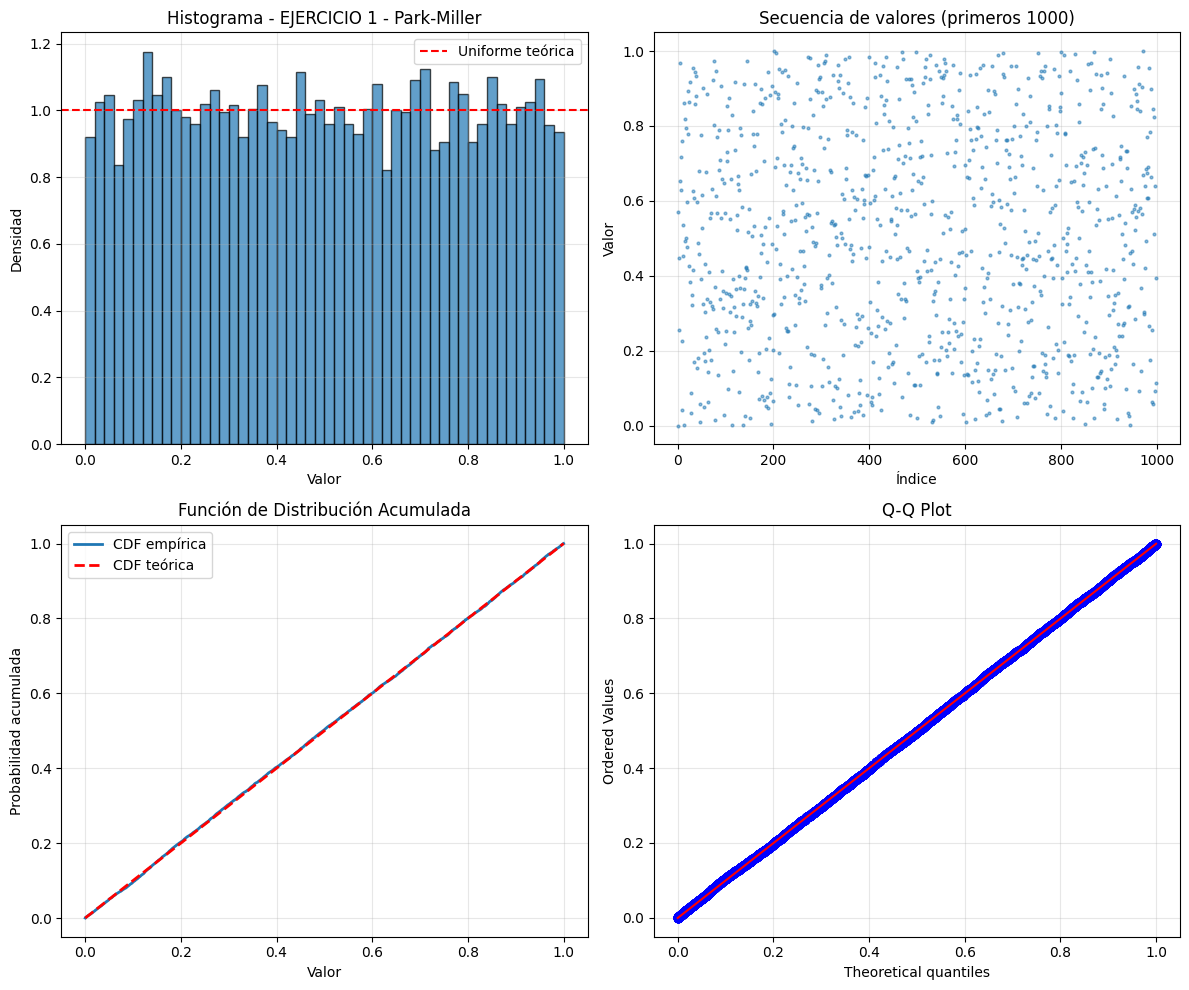

In [6]:
print("="*60)
print("CONJUNTO DE PARÁMETROS 1: Park-Miller (MINSTD)")
print("="*60)
m1 = 2**31 - 1
a1 = 48271
c1 = 0

lcg1 = LCG(m1, a1, c1, seed)
muestra1 = lcg1.generate_uniform_01(N)

estadisticos(muestra1, "EJERCICIO 1 (Park-Miller)")
prueba_kolmogorov_smirnov(muestra1)
prueba_chi_cuadrado(muestra1)
graficar_resultados(muestra1, "EJERCICIO 1 - Park-Miller")

## Conjunto de Parámetros 2: Numerical Recipes


CONJUNTO DE PARÁMETROS 2: Numerical Recipes

=== Estadísticos para EJERCICIO 2 (Numerical Recipes) ===
Media: 0.504030
Varianza: 0.084507
Desviación estándar: 0.290701
Mínimo: 0.000339
Máximo: 0.999856

=== Prueba de Kolmogorov-Smirnov ===
Estadístico KS: 0.012506
P-valor: 0.086867
No se rechaza H0: Los datos siguen una distribución uniforme (0,1)

=== Prueba de Chi-Cuadrado ===
Estadístico Chi²: 9.758000
Grados de libertad: 9
P-valor: 0.370429
No se rechaza H0: Los datos siguen una distribución uniforme


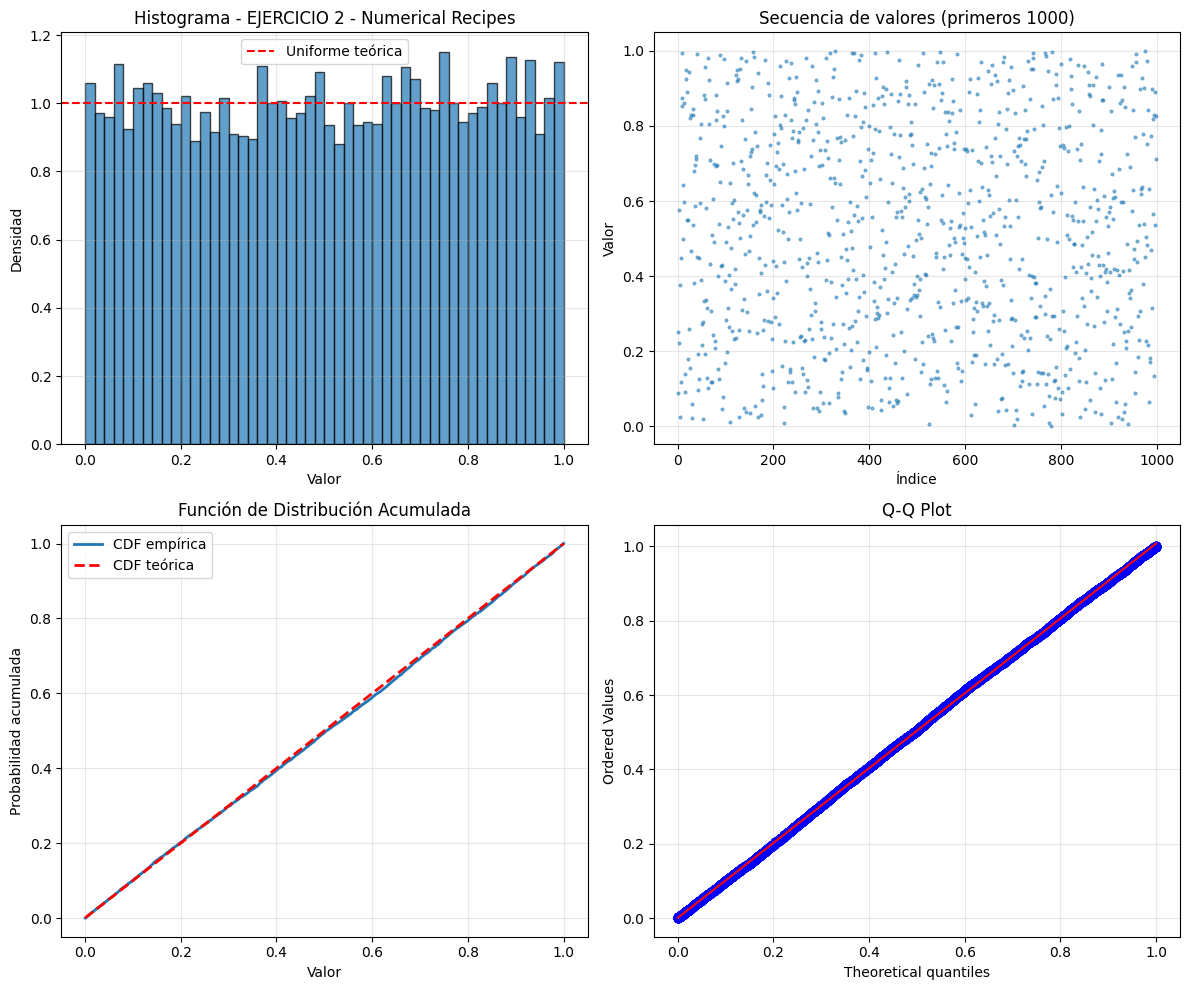

In [7]:
print("\n" + "="*60)
print("CONJUNTO DE PARÁMETROS 2: Numerical Recipes")
print("="*60)
m2 = 2**32
a2 = 1664525
c2 = 1013904223

lcg2 = LCG(m2, a2, c2, seed)
muestra2 = lcg2.generate_uniform_01(N)

estadisticos(muestra2, "EJERCICIO 2 (Numerical Recipes)")
prueba_kolmogorov_smirnov(muestra2)
prueba_chi_cuadrado(muestra2)
graficar_resultados(muestra2, "EJERCICIO 2 - Numerical Recipes")

## Comparación con generador de NumPy

In [8]:
print("\n" + "="*60)
print("COMPARACIÓN CON GENERADOR DE NUMPY")
print("="*60)
muestra_numpy = np.random.uniform(0, 1, N)
estadisticos(muestra_numpy, "NumPy Uniform")
prueba_kolmogorov_smirnov(muestra_numpy)
prueba_chi_cuadrado(muestra_numpy)


COMPARACIÓN CON GENERADOR DE NUMPY

=== Estadísticos para NumPy Uniform ===
Media: 0.500051
Varianza: 0.083222
Desviación estándar: 0.288482
Mínimo: 0.000042
Máximo: 0.999832

=== Prueba de Kolmogorov-Smirnov ===
Estadístico KS: 0.005977
P-valor: 0.865085
No se rechaza H0: Los datos siguen una distribución uniforme (0,1)

=== Prueba de Chi-Cuadrado ===
Estadístico Chi²: 7.830000
Grados de libertad: 9
P-valor: 0.551365
No se rechaza H0: Los datos siguen una distribución uniforme


(np.float64(7.83), np.float64(0.5513649035472148))